<a href="https://colab.research.google.com/github/zzl-hyun/24-1-BIgdata/blob/main/2020_%EB%8F%85%EC%84%9C_%ED%96%89%ED%83%9C_%ED%8A%B9%EC%84%B1_%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024-1 빅데이터 개론
202246109 김기현

- 이번 과제의 목적은 2020년 독서율, 독서량 데이터를 다양한 관점에서 분석하여 독서 행태의 특성을 파악하는 것입니다.
- 이를 위해 성별, 연령대, 지역별 독서율 및 독서량을 비교 분석하였으며, 이러한 요인들이 독서율에 어떤 영향을 미치는지 검토하였습니다.
- 또한, 성별 및 연령대, 성별 및 지역별 독서율의 상호작용을 분석하여 종합적인 독서 습관을 이해하고자 하였습니다.

- 데이터 출처

  - 2020 연간 독서율: https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=b51a8610-3e8c-11eb-af9a-4b03f0a582d6
  - 2020 연간 독서량: https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=befff0c0-3e8c-11eb-af9a-4b03f0a582d6

# 0. 전처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 독서율
readRT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020 독서룰.csv')
readRT.drop(columns=['ANALS_TRGET_YEAR','ANALS_TRGET_MT'],inplace=True)
readRT

,AREA_NM,AGE_FLAG_NM,SEXDSTN_FLAG_NM,LON_MBER_CO,ALL_MBER_CO,READ_RT
0,강원도,영유아(0-5),남자,182,873,20.848
1,강원도,영유아(0-5),여자,150,1903,7.882
2,강원도,유아(6-7),남자,246,1243,19.791
3,강원도,유아(6-7),여자,208,1021,20.372
4,강원도,초등(8-13),남자,1515,11320,13.383
...,...,...,...,...,...,...
3667,충청북도,40대,여자,3051,68160,4.476
3668,충청북도,50대,남자,648,26674,2.429
3669,충청북도,50대,여자,814,32660,2.492
3670,충청북도,60대이상,남자,537,12458,4.310


In [ ]:
# 독서량
readQY = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2020 독서량.csv')
readQY.drop(columns=['ANALS_TRGET_YEAR','ANALS_TRGET_MT'],inplace=True)
readQY

,AREA_NM,AGE_FLAG_NM,SEXDSTN_FLAG_NM,LON_CO,LON_MBER_CO,READ_QY
0,강원도,영유아(0-5),남자,1480,182,8.132
1,강원도,영유아(0-5),여자,1403,150,9.353
2,강원도,유아(6-7),남자,2108,246,8.569
3,강원도,유아(6-7),여자,1774,208,8.529
4,강원도,초등(8-13),남자,12535,1515,8.274
...,...,...,...,...,...,...
3667,충청북도,40대,여자,24070,3051,7.889
3668,충청북도,50대,남자,4278,648,6.602
3669,충청북도,50대,여자,5090,814,6.253
3670,충청북도,60대이상,남자,4128,537,7.687


In [ ]:
readRT.columns = ['지역', '연령', '성별', '대출회원', '전체회원', '독서율']
readQY.columns = ['지역', '연령', '성별', '대출건수', '대출회원', '독서량']

In [ ]:
read = pd.merge(readRT, readQY[['지역', '연령', '성별', '대출건수', '대출회원', '독서량']], on=['지역', '연령', '성별', '대출회원'])
read.dropna()

,지역,연령,성별,대출회원,전체회원,독서율,대출건수,독서량
0,강원도,영유아(0-5),남자,182,873,20.848,1480,8.132
1,강원도,영유아(0-5),여자,150,1903,7.882,1403,9.353
2,강원도,유아(6-7),남자,246,1243,19.791,2108,8.569
3,강원도,유아(6-7),여자,208,1021,20.372,1774,8.529
4,강원도,초등(8-13),남자,1515,11320,13.383,12535,8.274
...,...,...,...,...,...,...,...,...
4345,충청북도,40대,여자,3051,68160,4.476,24070,7.889
4346,충청북도,50대,남자,648,26674,2.429,4278,6.602
4347,충청북도,50대,여자,814,32660,2.492,5090,6.253
4348,충청북도,60대이상,남자,537,12458,4.310,4128,7.687


#1. 기초통계량 및 시각화

먼저,전체 데이터에 대한 기초 통계량을 계산하고 시각화를 통해 데이터의 분포를 파악하였습니다.

히스토그램을 통해 데이터가 정규 분포를 따르는지 여부를 검토하였으며, 박스플롯을 통해 이상치를 확인하였습니다.

In [ ]:
read.describe()

,대출회원,전체회원,독서율,대출건수,독서량
count,4350.000000,4.350000e+03,4350.000000,4350.000000,4332.000000
mean,2406.316782,7.391414e+04,10.095968,17301.206667,7.123880
std,5376.477238,1.626574e+05,15.430017,42100.822116,2.708619
min,0.000000,8.200000e+01,0.000000,0.000000,1.000000
25%,361.000000,8.257000e+03,2.087000,2468.000000,4.936000
50%,896.000000,2.363100e+04,4.209500,5538.000000,6.777000
75%,2107.250000,5.633100e+04,11.023000,15351.250000,8.636750
max,80281.000000,1.033947e+06,124.437000,675155.000000,52.000000


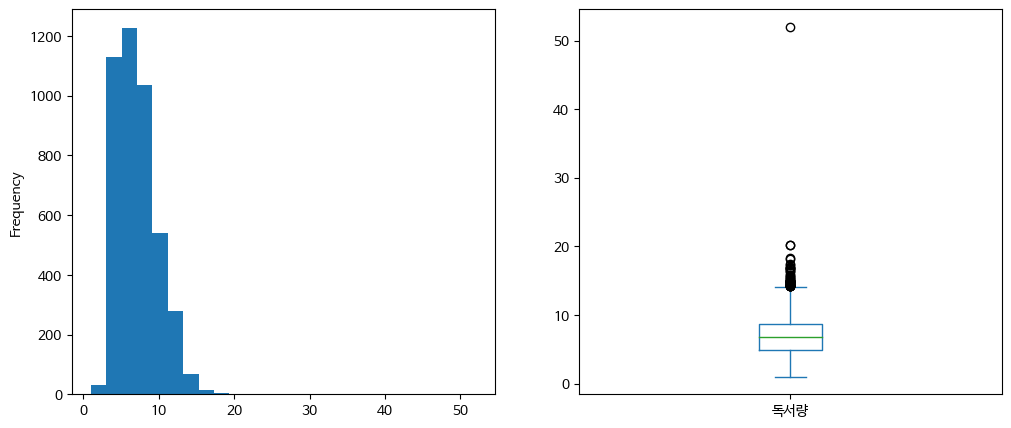

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# hist
read['독서량'].plot.hist(ax=ax[0], bins=25)

# box
read['독서량'].plot.box(ax=ax[1])

plt.show()

독서량에 이상점이 있는걸 확인할 수 있다.

## 1.2 성별에 따른 독서량 및 독서율

In [ ]:
# 성별
gender = read.drop(columns=['연령', '지역', '독서율']).groupby(['성별']).mean()
gender.head()

,대출회원,전체회원,대출건수,독서량
성별,,,,
남자,1837.392301,64641.421173,13509.319432,7.171311
여자,2978.915129,83246.739391,21117.580258,7.076053


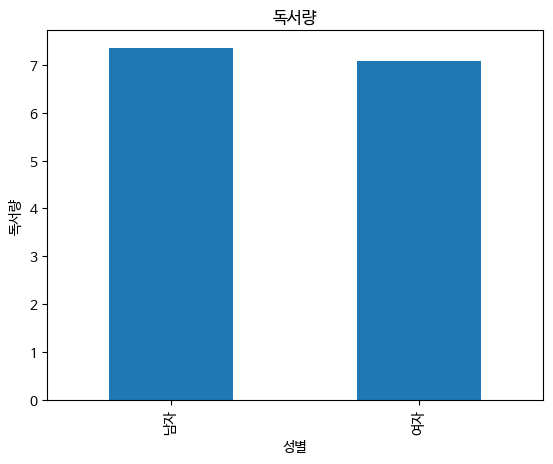

In [ ]:
# 성별 독서량

(gender['대출건수']/ gender['대출회원']).plot.bar(title='독서량')
plt.xlabel('성별')
plt.ylabel('독서량')
plt.show()

성별에 따른 독서량은 평균 7권으로 크게 차이가 없어보인다.

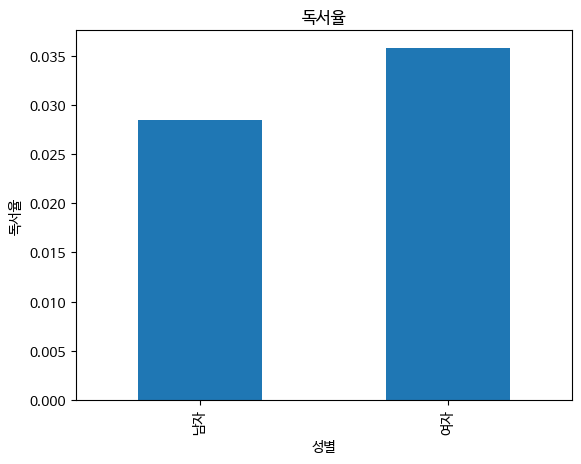

In [ ]:
# 성별 독서율
(gender['대출회원'] / gender['전체회원']).plot.bar(title='독서율')
plt.xlabel('성별')
plt.ylabel('독서율')
plt.show()

남성과 여성의 독서량의 차이는 없지만
독서율은 5% 정도의 차이가 나는걸 알 수 있다.

## 1.3 연령에 따른 독서량 및 독서율

In [ ]:
# 연령
age = read.drop(columns=['성별', '지역', '독서율']).groupby(['연령']).mean()
age


,대출회원,전체회원,대출건수,독서량
연령,,,,
20대,1818.687500,144220.981855,7162.068548,4.109225
30대,3918.834034,147285.813025,29198.466387,7.121057
40대,6987.376050,157113.924370,52793.636555,7.312046
50대,2037.452083,85756.664583,11090.522917,5.450310
60대이상,1192.755230,38433.315900,7589.834728,6.461134
영유아(0-5),450.903614,2808.307229,4910.387550,10.079564
유아(6-7),711.355102,3810.975510,7911.769388,10.249494
청소년(14-19),1591.146444,58623.422594,7271.552301,4.404562
초등(8-13),3121.876569,29866.935146,29142.861925,8.910226


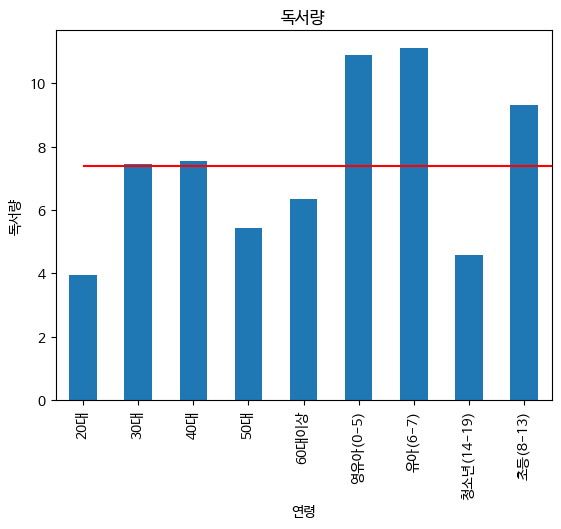

In [ ]:
#  연령별 독서량

(age['대출건수'] / age['대출회원']).plot.bar( title='독서량')
plt.xlabel('연령')
plt.ylabel('독서량')
plt.hlines((age['대출건수'] / age['대출회원']).mean(), xmin = 0 , xmax = 100, color='r')
plt.show()


연간 독서량이 낮은 하위권은 20대와 청소년 이라는걸 알 수 있다.

연령별 독서율을 구해보겠다.

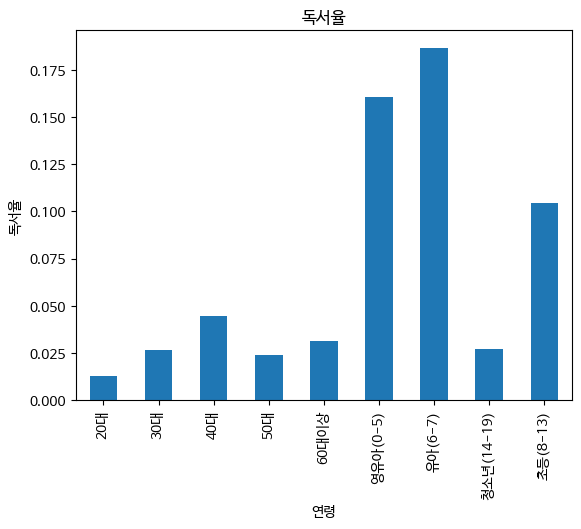

In [ ]:
# 연령별 독서율

(age['대출회원'] / age['전체회원']).plot.bar(title='독서율')
plt.xlabel('연령')
plt.ylabel('독서율')
plt.show()

20대의 독서율이 저조한걸 알 수 있다.

## 1.4 연령-성별에 따른 독서량 및 독서율

In [ ]:
# 연령-성별

age_gender = read.drop(columns=['지역', '독서율']).groupby(['연령', '성별']).mean()
age_gender

대출회원           전체회원          대출건수        독서량
연령         성별                                                     
20대        남자  1161.928571  125939.706349   4666.218254   4.190968
           여자  2496.979508  163101.643443   9739.750000   4.024790
30대        남자  2012.575630  121359.558824  13800.294118   6.763131
           여자  5825.092437  173212.067227  44596.638655   7.477479
40대        남자  4928.352941  125021.512605  38801.630252   7.551756
           여자  9046.399160  189206.336134  66785.642857   7.072336
50대        남자  1830.037500   77242.295833  10420.129167   5.661171
           여자  2244.866667   94271.033333  11760.916667   5.239450
60대이상      남자  1395.827731   40951.546218   8699.071429   6.353017
           여자   991.375000   35936.070833   6489.841667   6.568799
영유아(0-5)   남자   448.964844    2864.968750   4880.925781  10.263584
           여자   452.954545    2748.367769   4941.553719   9.882399
유아(6-7)    남자   714.094262    4226.750000   7854.950820  10.138996
           여자   708.638211    3398.581301   7968.126016  10.359079
청소년(14-19) 남자  1194.613445   56320.584034   5575.588235   4.480269
           여자  1984.375000   60907.070833   8953.383333   4.329172
초등(8-13)   남자  3023.256303   30329.424370  28226.323529   9.066857
           여자  3219.675000   29408.300000  30051.762500   8.754900

In [ ]:
age_gender_RT = (age_gender['대출건수'] / age_gender['대출회원'])
age_gender_RT.head()

연령   성별
20대  남자    4.015925
     여자    3.900613
30대  남자    6.857031
     여자    7.655954
40대  남자    7.873144
dtype: float64

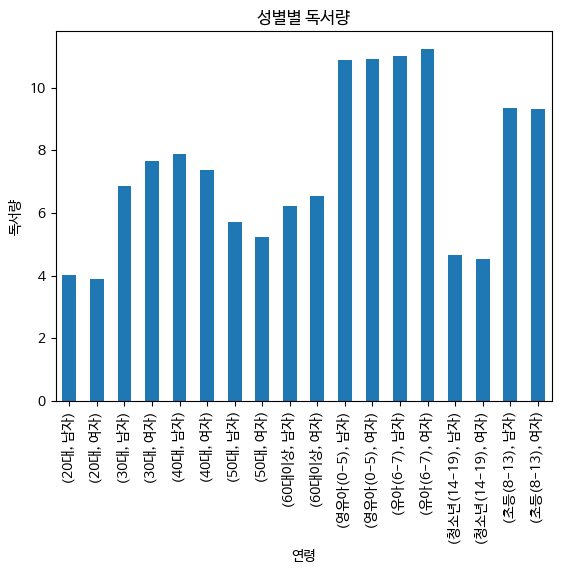

In [ ]:
# 연령-성별별 독서량
(age_gender['대출건수'] / age_gender['대출회원']).plot.bar()
plt.title('성별별 독서량')
plt.ylabel('독서량')
plt.xlabel('연령')
plt.show()

20대 남녀의 독서량은 차이가 없지만

30대 여성의 독서량은 30대 남성의 독서량보다 소폭 앞서는걸 볼 수 있다.

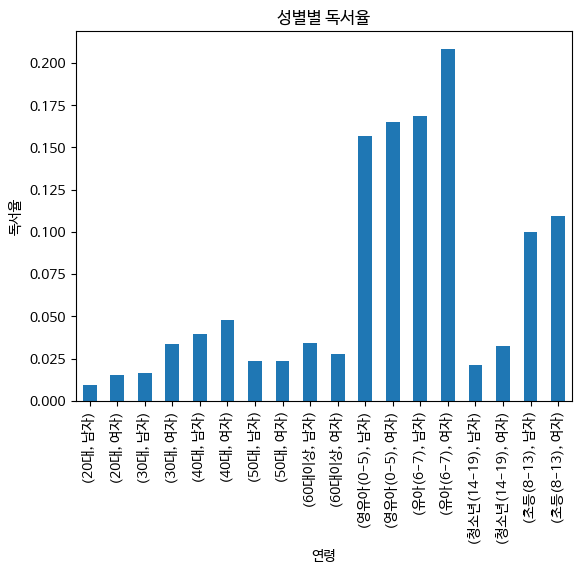

In [ ]:
# 연령-성별별 독서율

(age_gender['대출회원'] / age_gender['전체회원']).plot.bar()
plt.title('성별별 독서율')
plt.ylabel('독서율')
plt.xlabel('연령')
plt.show()


전체적으로 여성의 독서율이 남성보다 앞서는걸 볼 수 있다.

1명이 읽은 일반도서의 권 수인 **독서량**의 경우 남성이 여성보다 높지만

일반도서를 1권 이상 읽은 **독서율**은 여성이 남성보다 높다는걸 알 수 있다.


그렇다면 남성, 여성의 총 대출건수 중 누가 더 많을까?



In [ ]:
male = read[read['성별'] == '남자']['대출건수'].sum()
female = read[read['성별'] == '여자']['대출건수'].sum()
print(f'남자: {male}, 여성: {female} 비율:{male/female}')

남자: 29477335, 여성: 45782914 비율:0.6438501271456858


- 결론: 남성은 여성보다 책을  덜 읽는다!

## 1.5 지역별 독서량 및 독서율

In [ ]:
# 지역별 독서량 및 독셔율
region = read.drop(columns=['연령', '성별', '독서율']).groupby(['지역']).mean()
region

,대출회원,전체회원,대출건수,독서량
지역,,,,
강원도,1016.219231,20957.138462,6369.600000,6.352808
경기도,12981.392857,419019.277778,99574.384921,7.758500
경상남도,2051.460317,64643.007937,13830.321429,6.606829
경상북도,1206.311024,26530.594488,8099.440945,6.554098
광주광역시,687.984127,28960.126984,4858.567460,6.909937
대구광역시,2303.380952,27832.579365,20471.924603,8.437615
대전광역시,1104.779528,25419.787402,8355.606299,7.314587
부산광역시,3108.267717,60176.763780,21679.976378,7.126768
서울특별시,9188.956349,360437.722222,58762.408730,6.366829


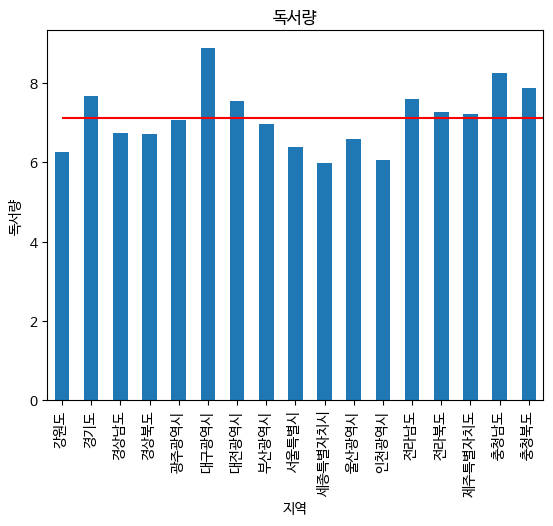

In [ ]:
# 지역별 독서량

(region['대출건수'] / region['대출회원']).plot.bar(title='독서량')
plt.xlabel('지역')
plt.ylabel('독서량')
plt.hlines((region['대출건수'] / region['대출회원']).mean(), color='r', xmin = 0, xmax = 100)
plt.show()

지역별로 독서량의 차이가 크게 나지 않는다는걸 알 수 있다.


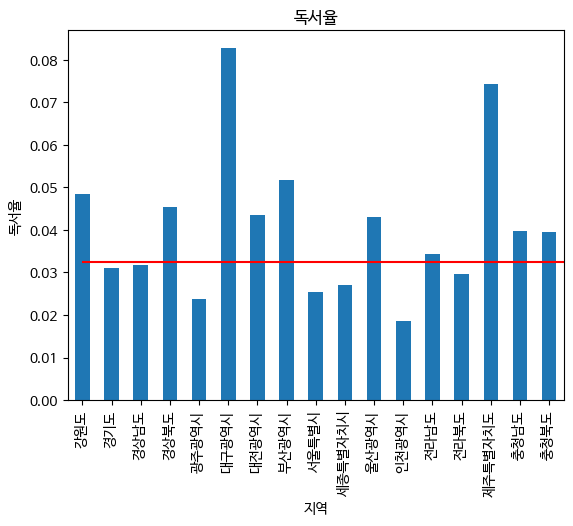

In [ ]:
# 지역별 독서율

(region['대출회원'] / region['전체회원']).plot.bar(title='독서율')
plt.xlabel('지역')
plt.ylabel('독서율')
plt.hlines(read['대출회원'].mean() / read['전체회원'].mean(), color='r', xmin = 0, xmax = 100)
plt.show()

지역별로 독서율의 차이가 왜 생기는지 모르겠다!!

독서율이 지역의 영향이 있는가? 에 대한 유의성 검정을 해보겠다!

In [ ]:
readRT_avg = read['대출회원'].mean() / read['전체회원'].mean()

print(f'전국민 연간 독서율: {100 * readRT_avg:.2f}%')

전국민 연간 독서율: 3.26%


In [ ]:
# 지역-전라북도로 설정
jeonbuk = read[read['지역'] == '전라북도']
jeonbuk

,지역,연령,성별,대출회원,전체회원,독서율,대출건수,독서량
234,전라북도,영유아(0-5),남자,172,374,45.989,1897,11.029
235,전라북도,영유아(0-5),여자,183,318,57.547,2006,10.962
236,전라북도,유아(6-7),남자,242,726,33.333,2569,10.616
237,전라북도,유아(6-7),여자,193,578,33.391,2143,11.104
238,전라북도,초등(8-13),남자,1224,7418,16.500,11062,9.038
...,...,...,...,...,...,...,...,...
4291,전라북도,40대,여자,1484,43234,3.432,11058,7.451
4292,전라북도,50대,남자,356,23330,1.526,2129,5.980
4293,전라북도,50대,여자,380,23681,1.605,2178,5.732
4294,전라북도,60대이상,남자,341,12543,2.719,2417,7.088


In [ ]:
# 전라북도의 연간 독서율
jeonbuk_readRT_avg = jeonbuk['대출회원'].mean() / jeonbuk['전체회원'].mean()
print(f'전라북도 연간 독서율: {100 * jeonbuk_readRT_avg:.2f}%')

전라북도 연간 독서율: 2.97%


평균 독서율이 0.326이고 특정 지역의 주민이 책을 읽을 확률 p 가 0.297 이라고 하는 귀무가설을 고려해본다.

전북도민의 전체회원수 19566인 Binomial(19566, 0.297)를 따르는 난수를 100000번 발생시킨다.



In [ ]:
binomial_counts = np.random.binomial(19566, 0.297, size= 100000)
binomial_counts

array([5826, 5811, 5878, ..., 5803, 5821, 5816])

<Axes: ylabel='Frequency'>

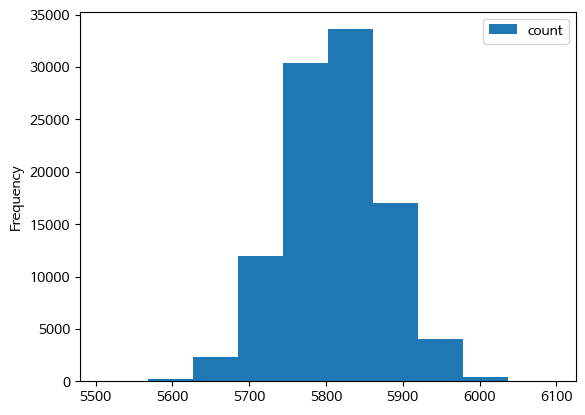

In [ ]:
binomial_df = pd.DataFrame({'count':binomial_counts})
binomial_df.plot.hist()

In [ ]:
observed_count = 0.326 * 19566
binomial_counts >= observed_count

array([False, False, False, ..., False, False, False])

In [ ]:
pValue = np.sum(binomial_counts >= observed_count) / 100000
pValue

0.0

In [ ]:
pValue < 0.05

True

pValue 의 값이 유의수준 0.05보다 작으므로 귀무가설을 기각할 수 있다.

그렇다면 전라북도 말고 가장 낮았던 인천광역시로 한 번 더 해보겠다.

In [ ]:
# 인천광역시 독서율
incheon = read[read['지역'] == '인천광역시']
incheon_readRT_avg = incheon['대출회원'].mean() / incheon['전체회원'].mean()
print(f'인천광역시 연간 독서율: {100 * incheon_readRT_avg:.2f}%')

인천광역시 연간 독서율: 1.86%


<Axes: ylabel='Frequency'>

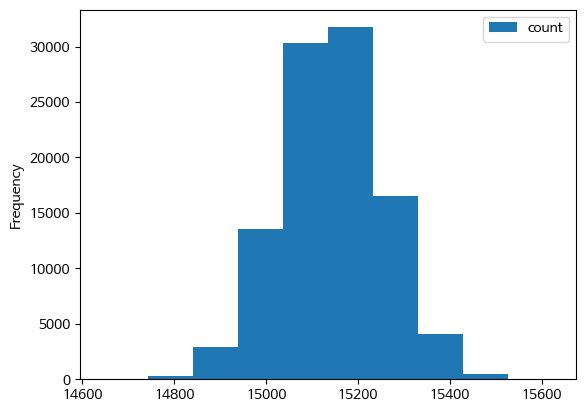

In [ ]:
binomial_counts = np.random.binomial(81414, 0.186, size= 100000)
binomial_df = pd.DataFrame({'count':binomial_counts})
binomial_df.plot.hist()

In [ ]:
observed_count = 0.326 * 81414
pValue = np.sum(binomial_counts >= observed_count) / 100000
pValue < 0.05

True

귀무가설이 모두 기각되므로 독서율은 지역차이가 영향이 있다는걸 알 수 있다!

# 2 분야별 대출
사람들이 어떤 종류의 책을 읽는지 살펴보자

출처: https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=25717545-3bb2-48b4-bf4c-9aef1a3872f8

In [ ]:
category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021분류별 대출.csv')
category

,SEASON_NM,WKDAY_NM,LBRRY_NM,CL_NM,VLM_NM,TOT_CAS_CO
0,가을,금,강서기적의도서관,기술과학,미니멀라이프 수납법 : 인기 미니멀리스트 33인의 수납 아이디어 : for simp...,6
1,가을,금,강서기적의도서관,기술과학,아무것도 없는 방에 살고 싶다,6
2,가을,금,강서기적의도서관,기술과학,이기는 부모 : 화내지 않는 육아,6
3,가을,금,강서기적의도서관,문학,(Disney)주토피아,5
4,가을,금,강서기적의도서관,문학,(앤서니 브라운의)행복한 미술관,5
...,...,...,...,...,...,...
139633,여름,수,금곡도서관,총류,세계의 도서관,6
139634,여름,수,금곡도서관,총류,일독일행 독서법 : 문제아를 국내 제일의 독서 컨설팅 CEO로 만든 기적의 독서법,6
139635,여름,수,금곡도서관,총류,코딩 인터뷰 완전분석 : 150가지 프로그래밍 문제와 해법,6
139636,여름,수,금정도서관,기술과학,(스펙보다 중요한) 내 아이의 자존감,5


In [ ]:
category.drop(columns=['SEASON_NM', 'WKDAY_NM', 'LBRRY_NM', 'VLM_NM'], inplace=True)
category

,CL_NM,TOT_CAS_CO
0,기술과학,6
1,기술과학,6
2,기술과학,6
3,문학,5
4,문학,5
...,...,...
139633,총류,6
139634,총류,6
139635,총류,6
139636,기술과학,5


In [ ]:
category.columns = ['분야', '총건수']
category

,분야,총건수
0,기술과학,6
1,기술과학,6
2,기술과학,6
3,문학,5
4,문학,5
...,...,...
139633,총류,6
139634,총류,6
139635,총류,6
139636,기술과학,5


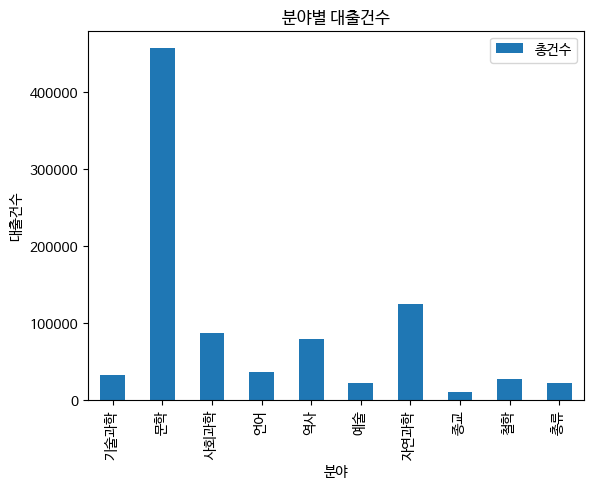

In [ ]:
category = category.groupby(['분야']).sum()
category.plot.bar()
plt.title('분야별 대출건수')
plt.xlabel('분야')
plt.ylabel('대출건수')
plt.show()

사람들이 문학분야를 제일 많이 대출한다는걸 알 수 있다!